# Punto 2

In [1]:
# Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson
from scipy import stats

# Utils
separator = '=' * 30
plt.rcParams['text.usetex'] = True

In [2]:
# Dataset
data = pd.read_excel('./datasets/data_exam1.xlsx', sheet_name='data2')
data.head()

,Y,X
0,12.189142,0.226957
1,12.187456,0.088938
2,11.782692,0.199069
3,5.732032,0.003812
4,7.026970,0.004573


## Analisis univariado

                 Y             X
count  1000.000000  1.000000e+03
mean      9.445622  7.234805e-02
std       3.908189  9.753985e-02
min     -12.073239  1.343729e-08
25%       7.411486  8.450417e-03
50%      10.072134  3.655172e-02
75%      12.082546  9.992523e-02
max      17.838788  9.397465e-01
Data Types
Y    float64
X    float64
dtype: object
Missing Values
Y    0
X    0
dtype: int64


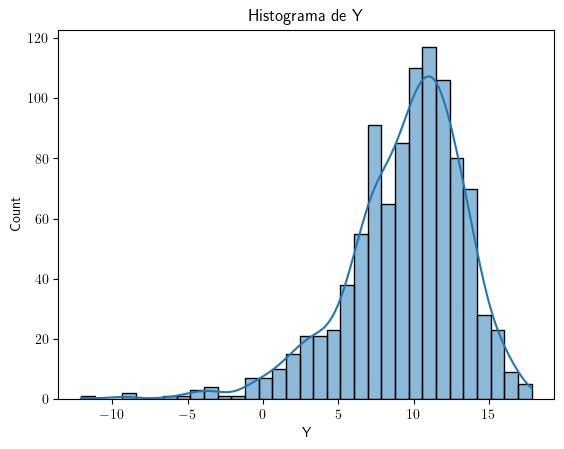

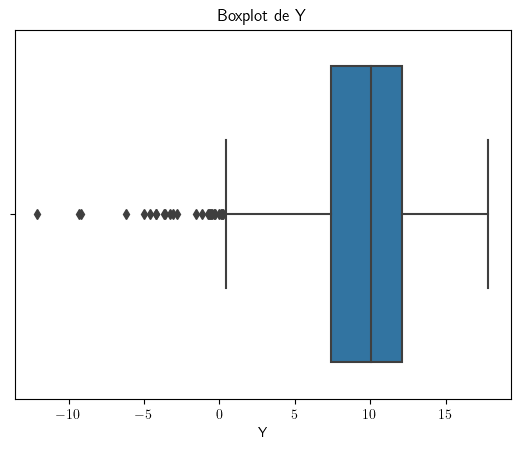

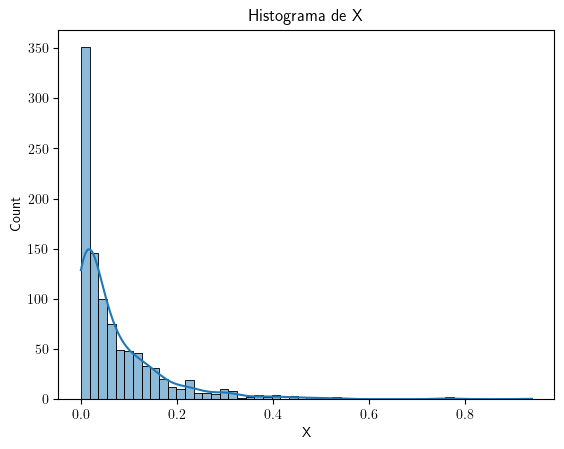

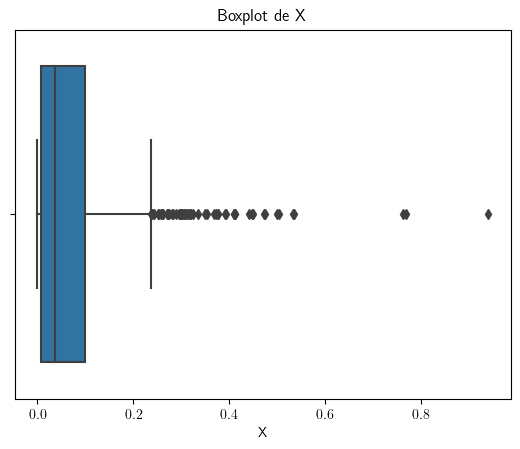

In [11]:
print(data.describe())
print(separator)
print('Data Types')
print(separator)
print(data.dtypes)
print(separator)
print('Missing Values')
print(separator)
print(data.isnull().sum())

def column_single_visualization(column):
    # Histograma
    sns.histplot(data[column], kde=True)
    plt.title(f'Histograma de {column}')
    plt.show()
    # Boxplot
    sns.boxplot(x=data[column])
    plt.title(f'Boxplot de {column}')
    plt.show()
for x in data.columns:
    column_single_visualization(x)


- Y
  - la variable Y parece tener una distribución aproximadamente normal, con un rango de valores de alrededor de -10 a más de 15 y un pico en torno a 5
  - Aunque hay varios valores atípicos en el lado izquierdo, no son extremadamente distantes, lo que sugiere una ligera presencia de valores bajos inusuales. No hay atípicos en el lado derecho, indicando que no hay valores extremadamente altos. En general, la distribución parece bastante consistente con una distribución normal, excepto por los pocos atípicos mencionados.
- X
  - Tiene una distribución que es fuertemente asimétrica hacia la derecha, con la mayoría de los valores concentrados cerca de cero.
  - Parece tratarse de un conjunto de datos que tiene un piso en cero y no tienen un límite superior definido
  - La distribución es asimétrica a la izquierda con la mediana muy cerca del límite inferior de la caja, indicando una concentración de valores bajos
  - Hay una variabilidad moderada con una cola larga hacia la derecha
  - valores extremos superiores


## Analisis multivariado

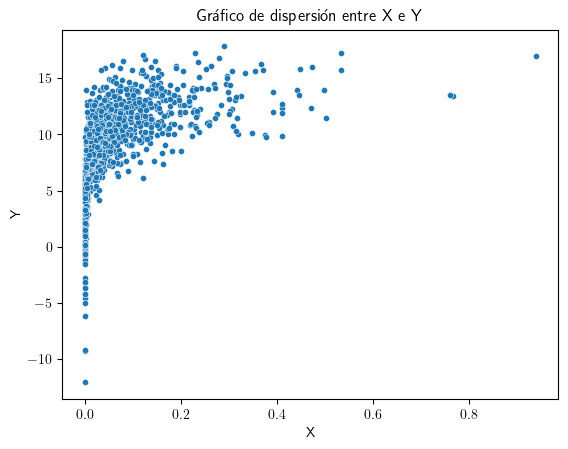

In [21]:
sns.scatterplot(data=data, x='X', y='Y', marker='o', s=20)
plt.title('Gráfico de dispersión entre X e Y')
plt.show()

- Visualmente se nota una relación no lineal compleja
- Hay una densa concentración de puntos que se extiende hacia valores bajos y altos de Y
- Para valores más altos de X, la variabilidad en Y disminuye, y hay menos puntos, indicando una dispersión menor

In [23]:
# Pearsons correlation
print('Pearson')
print(data[['X', 'Y']].corr(), '\n', separator)

# Spearman correlation
print('Spearmans')
print(data[['X', 'Y']].corr(method='spearman'), '\n', separator)

# Kendall correlation
print('Kenall')
print(data[['X', 'Y']].corr(method='kendall'), '\n', separator)


Pearson
          X         Y
X  1.000000  0.520376
Y  0.520376  1.000000 
Spearmans
          X         Y
X  1.000000  0.767833
Y  0.767833  1.000000 
Kenall
          X         Y
X  1.000000  0.580777
Y  0.580777  1.000000 


- El coeficiente de Pearson de 0.520376 sugiere una correlación moderada y lineal. Sin embargo, dado que el coeficiente de Spearman es significativamente más alto (0.767833), esto indica que la relación entre X y Y es más fuerte y posiblemente no lineal.
- Estas correlaciones sugieren que a medida que X aumenta, Y también tiende a aumentar, pero la relación no necesariamente sigue un patrón lineal estricto.


- El gráfico de disperción sugiere una relación entre X y Y que no parece ser puramente lineal; la relación muestra un patrón distintivo que se amplía y luego se estrecha, indicando una variabilidad heterogénea de Y a lo largo de los valores de X.
- La dispersión de los datos no sigue una trayectoria recta, sino que muestra un patrón curvo o en forma de abanico
  - Esto implica que la relación entre las dos variables no se puede describir adecuadamente con una línea recta,
- La correlación de Pearson indica una relación moderada, mientras que la correlación de Spearman es significativamente más alta, lo cual sugiere que la relación es más fuerte cuando se considera el orden de los datos en lugar de su valor numérico exacto. 
  - Esto también es un indicativo de que la relación no es puramente lineal, ya que la correlación de Pearson es la que mide la relación lineal, mientras que Spearman y Kendall son más robustas a relaciones monotónicas no lineales.

### Parte 2
- Dado que X tiene una distribución sesgada hacia la derecha con una concentración de valores cercanos a cero, podríamos aplicar una transformación que expanda la escala en la región de valores bajos y comprima los valores más altos. 
- Una transformación logarítmica (log(x+1) para evitar el logaritmo de cero) podría ser adecuada. Esta transformación podría hacer que la distribución de X sea más simétrica y potencialmente linealizar la relación entre X y Y.

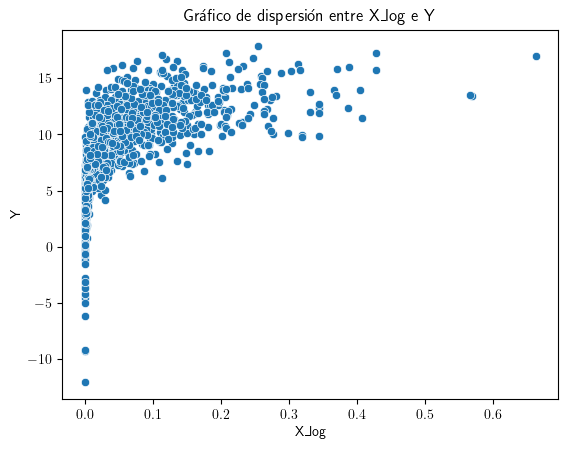

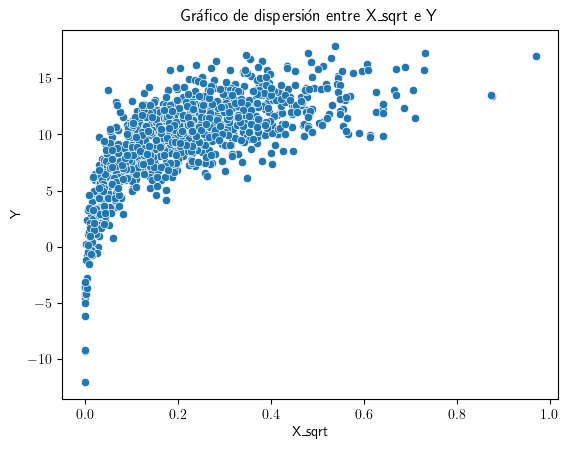

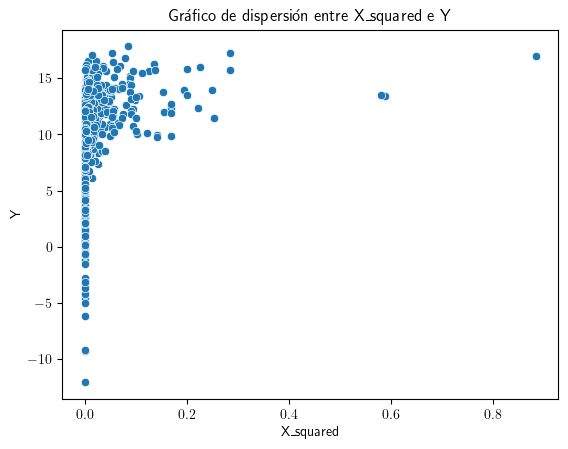

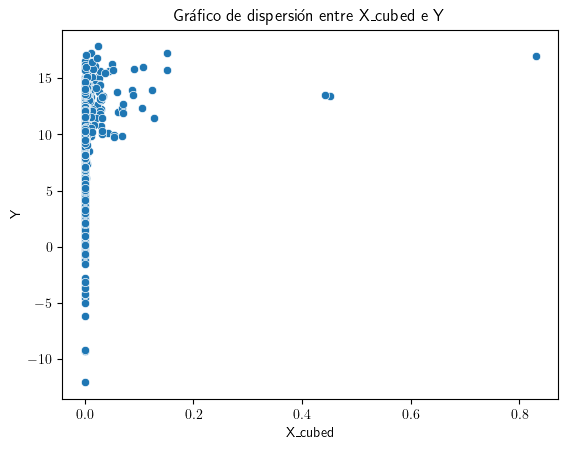

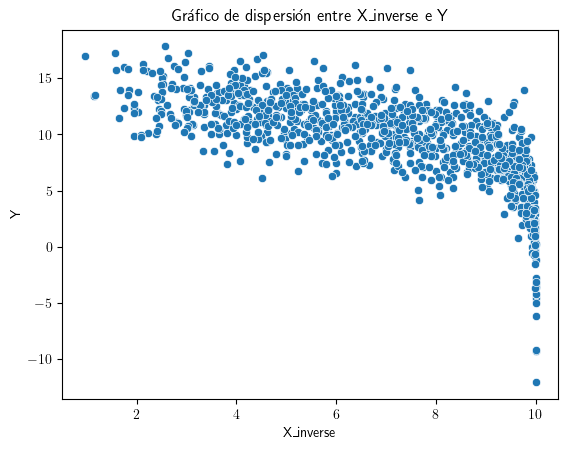

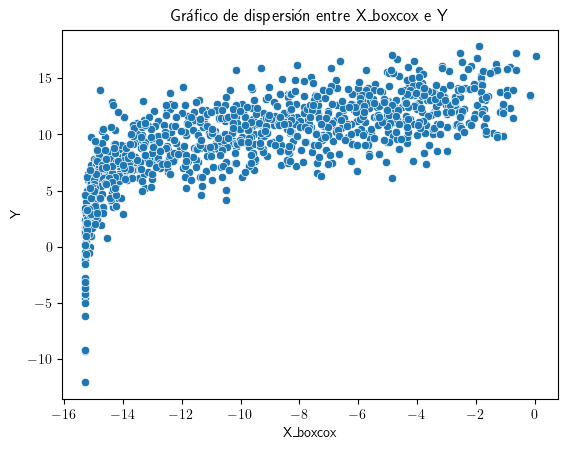

In [47]:
# Transformación logarítmica
data['X_log'] = np.log1p(data['X'])
data['X_sqrt'] = np.sqrt(data['X'])
data['X_squared'] = data['X'] ** 2
data['X_cubed'] = data['X'] ** 3
data['X_inverse'] = 1 / (data['X'] + 0.1)
data['X_boxcox'], fitted_lambda = stats.boxcox(data['X'] + 0.1)

def scatter_per_solution(_x):
  for x in _x:
    sns.scatterplot(data=data, x=x, y='Y')
    plt.title(f'Gráfico de dispersión entre {x} e Y')
    plt.show()
scatter_per_solution([
  'X_log',
  'X_sqrt',
  'X_squared',
  'X_cubed',
  'X_inverse',
  'X_boxcox'
])

- La mejor transformación es la de Box-cox
  - La relación entre las variables transformadas parece ser más continua y podría aproximarse mejor con un modelo.
  - La variabilidad en Y parece ser más uniforme a lo largo de los valores de X (boxcox) sugiriendo que la heteroscedasticidad puede haber sido reducida

In [33]:
model = smf.ols('Y ~ X_boxcox', data=data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.513
Model:                            OLS   Adj. R-squared:                  0.513
Method:                 Least Squares   F-statistic:                     1053.
Date:                Wed, 17 Apr 2024   Prob (F-statistic):          2.88e-158
Time:                        00:36:03   Log-Likelihood:                -2421.4
No. Observations:                1000   AIC:                             4847.
Df Residuals:                     998   BIC:                             4857.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     15.4876      0.205     75.470      0.0

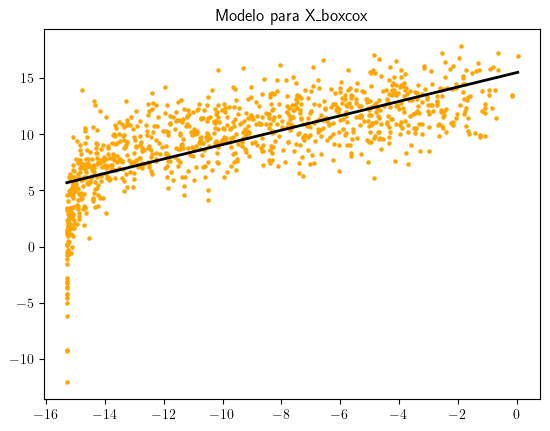

In [54]:
x_vals = np.linspace(data['X_boxcox'].min(), data['X_boxcox'].max(), 100)
pred_Y_ind_0 = model.params['Intercept'] + model.params['X_boxcox'] * x_vals

plt.scatter(data['X_boxcox'], data['Y'], color='orange', label='Ind = 1',  s=5)
plt.plot(x_vals, pred_Y_ind_0, color='black', linewidth=2, label='Regresión Ind = 0')
plt.title(f'Modelo para X_boxcox')
plt.show()

- X boxcox como variable independiente explica aproximadamente el 51.3% de la variabilidad de la variable dependiente Y
- El R cuadrado ajustado es también 0.513, lo que indica que el ajuste es bueno y que el modelo es relativamente eficiente al explicar la variabilidad en Y
- El coeficiente para X boxcox es 0.6404 y es estadísticamente significativo, como lo indica el valor P prácticamente nulo. Esto significa que hay una asociación positiva entre X boxcox y Y
  - A medida que X boxcox aumenta, Y también tiende a aumentar.
- aunque el modelo tiene una bondad de ajuste moderada y las relaciones son estadísticamente significativas, las pruebas de diagnóstico sugieren que la distribución de los residuos no cumple con todos los supuestos de la regresión lineal ordinaria

- Supuestos
  - Linealidad: Observando el gráfico, la relación entre X boxcox y Y parece aproximadamente lineal, lo que significa que un modelo lineal puede ser adecuado. La línea de regresión se ajusta a través del centro de la nube de puntos, lo que sugiere que la transformación de Box-Cox ha sido efectiva en linealizar la relación. Sin embargo, hay una concentración de valores que parecen desviarse de la línea hacia los extremos inferiores de la escala de X boxcox, lo que podría indicar que la linealidad no es perfecta.